In [1]:
from gamestate import GameState
import keyboard
import time
import os
import torch
import numpy as np

In [2]:
gamestate = GameState()

telemetry = gamestate.get_raw_telemetry()

for key in telemetry:
    print(f"{key}: {telemetry[key]}")

gamestate.close()

x: -262.1764831542969
y: 2225.9560546875
z: 123.05194854736328
speed: 0.00663444958627224
heading: 0.8687779903411865
gear: 2
steerAngle: 0.01226260606199503
brake: 0.0
gas: 0.0
normalizedCarPosition: 0.9847811460494995
num_wheels_off_track: 0
fl_ws: 0.07986310124397278
fr_ws: 0.06372972577810287
rl_ws: 0.06372769922018051
rr_ws: 0.06761801987886429
fl_sus: 0.07599697262048721
fr_sus: 0.07824426889419556
rl_sus: 0.09718865156173706
rr_sus: 0.09312180429697037
paused: False


In [3]:
tyres_out = 4

one_hot_tyres = np.zeros(5)
print(one_hot_tyres)

one_hot_tyres[tyres_out] = 1
print(one_hot_tyres)

[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1.]


***
### Get normalized telemetry data

In [29]:
gamestate = GameState()

telemetry = gamestate.get_raw_telemetry()
for key in telemetry:
    print(f"{key}: {telemetry[key]}")

norm_telemetry = gamestate.get_normalized_telemetry()
print(norm_telemetry)

gamestate.close()

x: -281.6839904785156
y: 2234.921142578125
z: 124.32154846191406
speed: 0.005497011821717024
heading: 1.0514336824417114
gear: 2
steerAngle: 0.0
brake: 0.0
gas: 0.0
normalizedCarPosition: 0.9854931831359863
num_wheels_off_track: 4
fl_ws: 0.07795851677656174
fr_ws: 0.11000089347362518
rl_ws: 0.09679152071475983
rr_ws: 0.11338868737220764
fl_sus: 0.07757064700126648
fr_sus: 0.07689714431762695
rl_sus: 0.09375262260437012
rr_sus: 0.0965375155210495
paused: False
[3.85575951e-01 9.57417135e-01 9.17544234e-01 2.17485846e-05
 0.00000000e+00 8.68135693e-01 4.96326928e-01 6.41009522e-02
 9.27728042e-02 1.19367363e-01 1.43307233e-01 7.75789917e-02
 7.68887103e-02 9.37534720e-02 9.65368003e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00]


In [5]:
norm_telemetry

array([3.88731353e-01, 9.55573368e-01, 9.13215413e-01, 2.32787705e-05,
       1.22626061e-02, 7.63540382e-01, 6.45760083e-01, 6.65525844e-02,
       5.31081048e-02, 7.96596240e-02, 8.45225248e-02, 7.59969726e-02,
       7.82442689e-02, 9.71886516e-02, 9.31218043e-02, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [ ]:
norm_telemetry = gamestate.get_normalized_telemetry()

for key in norm_telemetry:
    print(f"{key}: {norm_telemetry[key]}")

In [22]:
arr = np.array([1,2,3,4,5,6,7,8,9,10])
arr2 = np.array([11,12,13])

arr = np.concatenate([arr, arr2])

print(arr)
print(arr.shape)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
(13,)


***
### Test Suspension Travel Data

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
df = pd.read_excel("data/nord_20230721_020551.xlsx")

In [70]:
df.head()

,timestamps,x_coords,y_coords,z_coords,gears,speeds,headings,normalizedCarPositions,wheels_off_track,off_track,fl_wheel_slip,fr_wheel_slip,rl_wheel_slip,rr_wheel_slip,fl_suspension_travel,fr_suspension_travel,rl_suspension_travel,rr_suspension_travel
0,2023-07-21 01:57:44.641,-262.805450,-2225.736816,123.078194,1,0.004839,0.841441,0.984549,0,0,0.078090,0.067072,0.070238,0.071621,0.076141,0.077712,0.096600,0.093604
1,2023-07-21 01:57:44.874,-262.805237,-2225.736572,123.078178,1,0.004816,0.841432,0.984549,0,0,0.077751,0.067300,0.070157,0.071696,0.076138,0.077713,0.096594,0.093601
2,2023-07-21 01:57:44.974,-262.805115,-2225.736572,123.078171,1,0.004825,0.841429,0.984549,0,0,0.077871,0.067442,0.070130,0.071731,0.076141,0.077711,0.096599,0.093602
3,2023-07-21 01:57:45.075,-262.804993,-2225.736572,123.078156,1,0.005091,0.841426,0.984549,0,0,0.075387,0.069755,0.068079,0.073882,0.076203,0.077654,0.096667,0.093535
4,2023-07-21 01:57:45.176,-262.804840,-2225.736328,123.078148,1,0.005101,0.841423,0.984549,0,0,0.074810,0.070259,0.067853,0.074088,0.076274,0.077587,0.096744,0.093460


<Figure size 1000x1000 with 0 Axes>

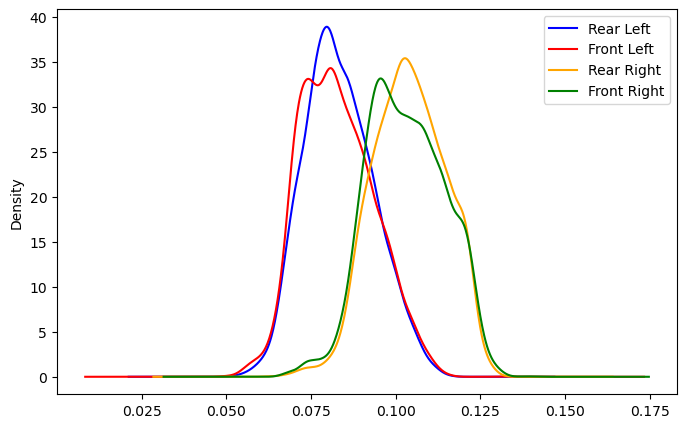

In [71]:
plt.figure(figsize=(10,10))
plt.figure(figsize=(8, 5))
pd.Series(df["fl_suspension_travel"]).plot.kde(color='blue', label="Rear Left")
pd.Series(df["fr_suspension_travel"]).plot.kde(color='red', label="Front Left")
pd.Series(df["rl_suspension_travel"]).plot.kde(color='orange', label="Rear Right")
pd.Series(df["rr_suspension_travel"]).plot.kde(color='green', label="Front Right")
# plt.xlim(0, 2)
plt.legend()
plt.show()

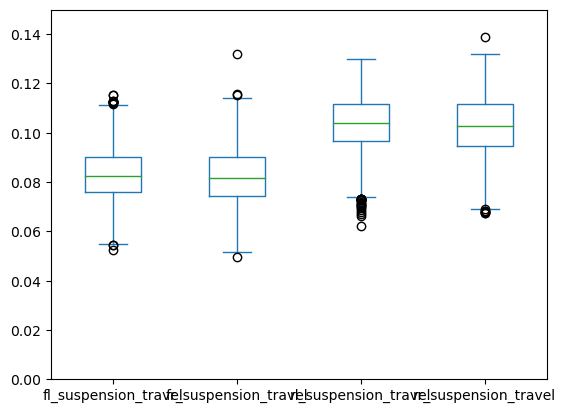

In [72]:
df[["fl_suspension_travel","fr_suspension_travel","rl_suspension_travel","rr_suspension_travel"]].plot.box()
plt.ylim(0, 0.15)
plt.show()

***
### Test Wheel Slip Data

<Figure size 1000x1000 with 0 Axes>

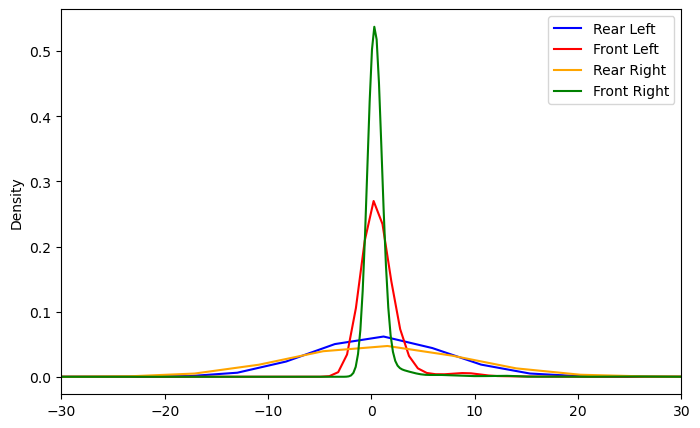

In [73]:
plt.figure(figsize=(10,10))
plt.figure(figsize=(8, 5))
pd.Series(df["fl_wheel_slip"]).plot.kde(color='blue', label="Rear Left")
pd.Series(df["fr_wheel_slip"]).plot.kde(color='red', label="Front Left")
pd.Series(df["rl_wheel_slip"]).plot.kde(color='orange', label="Rear Right")
pd.Series(df["rr_wheel_slip"]).plot.kde(color='green', label="Front Right")
plt.xlim(-30, 30)
plt.legend()
plt.show()

In [75]:
df["fl_wheel_slip_norm"] = (df["fl_wheel_slip"]-df["fl_wheel_slip"].mean()) / df["fl_wheel_slip"].std()
df["fr_wheel_slip_norm"] = (df["fr_wheel_slip"]-df["fr_wheel_slip"].mean()) / df["fr_wheel_slip"].std()
df["rl_wheel_slip_norm"] = (df["rl_wheel_slip"]-df["rl_wheel_slip"].mean()) / df["rl_wheel_slip"].std()
df["rr_wheel_slip_norm"] = (df["rr_wheel_slip"]-df["rr_wheel_slip"].mean()) / df["rr_wheel_slip"].std()

In [85]:
print(f'{round(df["fl_wheel_slip"].mean(),4)=}')
print(f'{round(df["fr_wheel_slip"].mean(),4)=}')
print(f'{round(df["rl_wheel_slip"].mean(),4)=}')
print(f'{round(df["rr_wheel_slip"].mean(),4)=}')
print()
print(f'{round(df["fl_wheel_slip"].std(),4)=}')
print(f'{round(df["fr_wheel_slip"].std(),4)=}')
print(f'{round(df["rl_wheel_slip"].std(),4)=}')
print(f'{round(df["rr_wheel_slip"].std(),4)=}')

round(df["fl_wheel_slip"].mean(),4)=1.3648
round(df["fr_wheel_slip"].mean(),4)=0.9597
round(df["rl_wheel_slip"].mean(),4)=1.4626
round(df["rr_wheel_slip"].mean(),4)=0.7643

round(df["fl_wheel_slip"].std(),4)=34.1651
round(df["fr_wheel_slip"].std(),4)=6.8757
round(df["rl_wheel_slip"].std(),4)=44.9431
round(df["rr_wheel_slip"].std(),4)=3.5982


<Figure size 1500x1500 with 0 Axes>

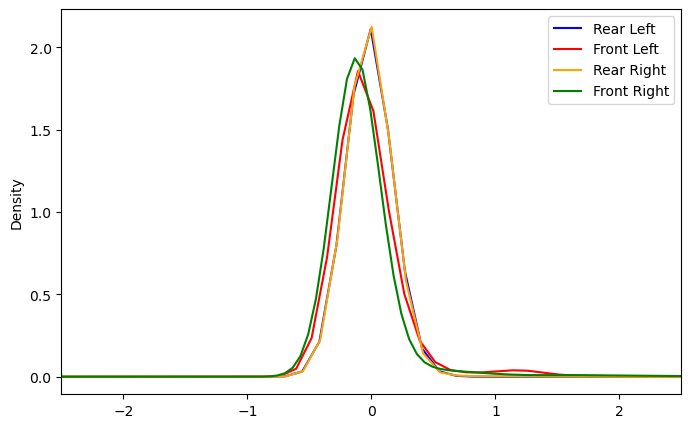

In [91]:
plt.figure(figsize=(15,15))
plt.figure(figsize=(8, 5))
pd.Series(df["fl_wheel_slip_norm"]).plot.kde(color='blue', label="Rear Left")
pd.Series(df["fr_wheel_slip_norm"]).plot.kde(color='red', label="Front Left")
pd.Series(df["rl_wheel_slip_norm"]).plot.kde(color='orange', label="Rear Right")
pd.Series(df["rr_wheel_slip_norm"]).plot.kde(color='green', label="Front Right")
plt.xlim(-2.5, 2.5)
plt.legend()
plt.show()

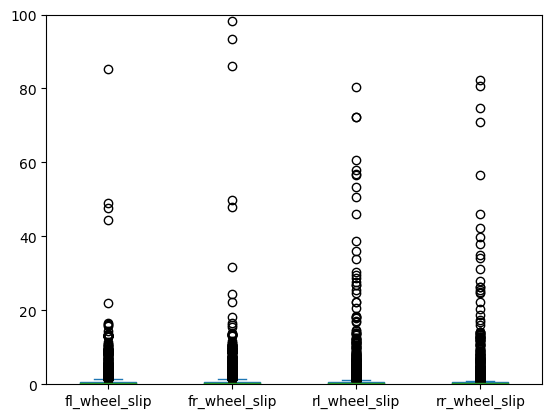

In [74]:
df[["fl_wheel_slip","fr_wheel_slip","rl_wheel_slip","rr_wheel_slip"]].plot.box()
plt.ylim(0, 100)
plt.show()

***
### Test get_obs() in gamestate.py

In [1]:
from gamestate import GameState

In [2]:
gamestate = GameState()

framestack, telemetry = gamestate.get_obs()

gamestate.close()

In [3]:
print(type(framestack))
print(framestack.shape)
print()
print(type(telemetry))
print(telemetry.shape)

<class 'torch.Tensor'>
torch.Size([4, 3, 84, 84])

<class 'torch.Tensor'>
torch.Size([20])


***